# Food Deserts in Northern CA
---

## ...

In [52]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from bokeh.models import HoverTool
import bokeh.models.formatters as fmtrs
from scipy.stats import linregress

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
food_deserts_usa = pd.read_csv("Resources/StateAndCountyData.csv")

# Display sample data
food_deserts_usa.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255


---

### Create Clean DataFrames for CA, The Bay Area, Greater Sacremento, and The Cental Valley.

In [3]:
#create a df that includes only the Counties in CA
food_deserts_ca = food_deserts_usa.loc[food_deserts_usa['State'] == 'CA']
del food_deserts_ca['State'] 

food_deserts_ca.head()

,FIPS,County,Variable_Code,Value
7625,6001,Alameda,LACCESS_POP10,160424.908700
7626,6001,Alameda,LACCESS_POP15,107964.398400
7627,6001,Alameda,PCH_LACCESS_POP_10_15,-32.700976
7628,6001,Alameda,PCT_LACCESS_POP10,10.622260
7629,6001,Alameda,PCT_LACCESS_POP15,7.148677


In [4]:
#Rotate the "Variable Codes" into the columns and then match them with the corresponding "Values" 
food_deserts_ca = food_deserts_ca.pivot_table(index='County', columns='Variable_Code', values='Value')
food_deserts_ca.head()

Variable_Code,AGRITRSM_OPS07,AGRITRSM_OPS12,AGRITRSM_RCT07,AGRITRSM_RCT12,BERRY_ACRES07,BERRY_ACRES12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,BERRY_FARMS07,BERRY_FARMS12,...,WICS16,WICSPTH11,WICSPTH16,WIC_PART_2012,WIC_PART_2013,WIC_PART_2014,WIC_PART_2015,WIC_PART_2016,WIC_PART_2017,WIC_PART_2018
County,,,,,,,,,,,,,,,,,,,,,
Alameda,4.0,16.0,29000.0,196000.0,NaN,2.0,NaN,0.001285,1.0,8.0,...,145.0,0.116264,0.087862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alpine,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amador,5.0,13.0,NaN,1037000.0,NaN,2.0,NaN,0.053910,2.0,11.0,...,9.0,0.239757,0.240397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Butte,22.0,38.0,287000.0,392000.0,65.0,84.0,0.298893,0.379738,33.0,34.0,...,23.0,0.131847,0.101532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calaveras,6.0,20.0,116000.0,1493000.0,23.0,20.0,0.497104,0.446877,14.0,14.0,...,7.0,0.243578,0.154515,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#print the California data to a csv
food_deserts_ca.to_csv("Outputs/all_ca_data.csv", index_label="County")
food_deserts_ca

Variable_Code,AGRITRSM_OPS07,AGRITRSM_OPS12,AGRITRSM_RCT07,AGRITRSM_RCT12,BERRY_ACRES07,BERRY_ACRES12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,BERRY_FARMS07,BERRY_FARMS12,...,WICS16,WICSPTH11,WICSPTH16,WIC_PART_2012,WIC_PART_2013,WIC_PART_2014,WIC_PART_2015,WIC_PART_2016,WIC_PART_2017,WIC_PART_2018
County,,,,,,,,,,,,,,,,,,,,,
Alameda,4.0,16.0,29000.0,196000.0,NaN,2.0,NaN,0.001285,1.0,8.0,...,145.0,0.116264,0.087862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alpine,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amador,5.0,13.0,NaN,1037000.0,NaN,2.0,NaN,0.053910,2.0,11.0,...,9.0,0.239757,0.240397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Butte,22.0,38.0,287000.0,392000.0,65.0,84.0,0.298893,0.379738,33.0,34.0,...,23.0,0.131847,0.101532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calaveras,6.0,20.0,116000.0,1493000.0,23.0,20.0,0.497104,0.446877,14.0,14.0,...,7.0,0.243578,0.154515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colusa,18.0,18.0,171000.0,206000.0,NaN,2.0,NaN,0.093589,3.0,3.0,...,7.0,0.422000,0.324781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contra Costa,13.0,33.0,487000.0,665000.0,27.0,19.0,0.026755,0.017604,13.0,22.0,...,95.0,0.114505,0.083539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Del Norte,4.0,13.0,45000.0,137000.0,14.0,7.0,0.492698,0.248218,7.0,11.0,...,2.0,0.246115,0.072934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
El Dorado,19.0,42.0,2539000.0,1146000.0,66.0,127.0,0.371425,0.703293,58.0,87.0,...,19.0,0.105020,0.102106,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 2: Narrow down the `food_deserts_ca` DataFrame to regions

In [6]:
bay_area_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']
bay_area_desert = food_deserts_ca.loc[bay_area_counties]

bay_area_desert.head()

Variable_Code,AGRITRSM_OPS07,AGRITRSM_OPS12,AGRITRSM_RCT07,AGRITRSM_RCT12,BERRY_ACRES07,BERRY_ACRES12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,BERRY_FARMS07,BERRY_FARMS12,...,WICS16,WICSPTH11,WICSPTH16,WIC_PART_2012,WIC_PART_2013,WIC_PART_2014,WIC_PART_2015,WIC_PART_2016,WIC_PART_2017,WIC_PART_2018
County,,,,,,,,,,,,,,,,,,,,,
Alameda,4.0,16.0,29000.0,196000.0,NaN,2.0,NaN,0.001285,1.0,8.0,...,145.0,0.116264,0.087862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contra Costa,13.0,33.0,487000.0,665000.0,27.0,19.0,0.026755,0.017604,13.0,22.0,...,95.0,0.114505,0.083539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marin,9.0,30.0,NaN,99000.0,4.0,10.0,0.016244,0.039059,9.0,15.0,...,16.0,0.078320,0.061389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Napa,29.0,119.0,1816000.0,23723000.0,15.0,13.0,0.113137,0.093488,8.0,13.0,...,18.0,0.166969,0.127492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
San Francisco,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,42.0,0.077236,0.048121,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sacramento_counties = ['Amador', 'Calaveras', 'El Dorado', 'Placer', 
                        'Sacramento', 'Yolo']
    
sacramento_desert = food_deserts_ca.loc[sacramento_counties]
sacramento_desert.head()

Variable_Code,AGRITRSM_OPS07,AGRITRSM_OPS12,AGRITRSM_RCT07,AGRITRSM_RCT12,BERRY_ACRES07,BERRY_ACRES12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,BERRY_FARMS07,BERRY_FARMS12,...,WICS16,WICSPTH11,WICSPTH16,WIC_PART_2012,WIC_PART_2013,WIC_PART_2014,WIC_PART_2015,WIC_PART_2016,WIC_PART_2017,WIC_PART_2018
County,,,,,,,,,,,,,,,,,,,,,
Amador,5.0,13.0,NaN,1037000.0,NaN,2.0,NaN,0.053910,2.0,11.0,...,9.0,0.239757,0.240397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calaveras,6.0,20.0,116000.0,1493000.0,23.0,20.0,0.497104,0.446877,14.0,14.0,...,7.0,0.243578,0.154515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
El Dorado,19.0,42.0,2539000.0,1146000.0,66.0,127.0,0.371425,0.703293,58.0,87.0,...,19.0,0.105020,0.102106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Placer,22.0,20.0,302000.0,72000.0,97.0,53.0,0.294812,0.146727,43.0,56.0,...,43.0,0.103842,0.113370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sacramento,18.0,45.0,435000.0,1137000.0,96.0,117.0,0.069507,0.080775,32.0,46.0,...,158.0,0.119966,0.104531,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
central_valley_counties = ['Fresno', 'Kern', 'Kings', 
                            'Madera', 'Mariposa', 'Merced', 'San Joaquin', 
                            'Stanislaus', 'Tulare', 'Tuolumne']

central_valley_desert =  food_deserts_ca.loc[central_valley_counties]
central_valley_desert.head()

Variable_Code,AGRITRSM_OPS07,AGRITRSM_OPS12,AGRITRSM_RCT07,AGRITRSM_RCT12,BERRY_ACRES07,BERRY_ACRES12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,BERRY_FARMS07,BERRY_FARMS12,...,WICS16,WICSPTH11,WICSPTH16,WIC_PART_2012,WIC_PART_2013,WIC_PART_2014,WIC_PART_2015,WIC_PART_2016,WIC_PART_2017,WIC_PART_2018
County,,,,,,,,,,,,,,,,,,,,,
Fresno,15.0,39.0,442000.0,743000.0,559.0,603.0,0.623931,0.636269,43.0,43.0,...,216.0,0.301231,0.220869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kern,11.0,27.0,594000.0,1091000.0,1112.0,1942.0,1.384323,2.267166,20.0,27.0,...,189.0,0.271182,0.214198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kings,0.0,8.0,0.0,46000.0,32.0,22.0,0.212738,0.145502,5.0,21.0,...,22.0,0.164597,0.147148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madera,6.0,16.0,546000.0,986000.0,23.0,95.0,0.157462,0.624343,9.0,12.0,...,29.0,0.224124,0.188116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mariposa,6.0,12.0,17000.0,69000.0,NaN,NaN,NaN,NaN,2.0,7.0,...,1.0,0.110084,0.057290,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
regions_desert = pd.concat([central_valley_desert, sacramento_desert, bay_area_desert])
regions_desert.head()

Variable_Code,AGRITRSM_OPS07,AGRITRSM_OPS12,AGRITRSM_RCT07,AGRITRSM_RCT12,BERRY_ACRES07,BERRY_ACRES12,BERRY_ACRESPTH07,BERRY_ACRESPTH12,BERRY_FARMS07,BERRY_FARMS12,...,WICS16,WICSPTH11,WICSPTH16,WIC_PART_2012,WIC_PART_2013,WIC_PART_2014,WIC_PART_2015,WIC_PART_2016,WIC_PART_2017,WIC_PART_2018
County,,,,,,,,,,,,,,,,,,,,,
Fresno,15.0,39.0,442000.0,743000.0,559.0,603.0,0.623931,0.636269,43.0,43.0,...,216.0,0.301231,0.220869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kern,11.0,27.0,594000.0,1091000.0,1112.0,1942.0,1.384323,2.267166,20.0,27.0,...,189.0,0.271182,0.214198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kings,0.0,8.0,0.0,46000.0,32.0,22.0,0.212738,0.145502,5.0,21.0,...,22.0,0.164597,0.147148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madera,6.0,16.0,546000.0,986000.0,23.0,95.0,0.157462,0.624343,9.0,12.0,...,29.0,0.224124,0.188116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mariposa,6.0,12.0,17000.0,69000.0,NaN,NaN,NaN,NaN,2.0,7.0,...,1.0,0.110084,0.057290,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#print the data for three regions we are focusing on to a csv
regions_desert.to_csv("Outputs/combined_regions_data.csv", index_label="County")

In [11]:
Access_regions_desert=regions_desert.loc[:,["LACCESS_POP10",
                                            "LACCESS_POP15",
                                            "PCH_LACCESS_POP_10_15",
                                            "LACCESS_LOWI10",
                                            "LACCESS_LOWI15",
                                            "PCH_LACCESS_LOWI_10_15"]]

Access_regions_desert=Access_regions_desert.rename(columns={"LACCESS_POP10":"2010 Pop w/Low Store Access",
                                            "LACCESS_POP15":"2015 Pop w/Low Store Access",
                                            "PCH_LACCESS_POP_10_15":"%change '10-'15 Pop w/Low Store Access",
                                            "LACCESS_LOWI10":"2010 Low Income Pop w/Low Store Access",
                                            "LACCESS_LOWI15":"2015 Low Income Pop w/Low Store Access",
                                            "PCH_LACCESS_LOWI_10_15":"%change '10-'15 Low Income Pop w/Low Store Access"})
Access_regions_desert.head()

Variable_Code,2010 Pop w/Low Store Access,2015 Pop w/Low Store Access,%change '10-'15 Pop w/Low Store Access,2010 Low Income Pop w/Low Store Access,2015 Low Income Pop w/Low Store Access,%change '10-'15 Low Income Pop w/Low Store Access
County,,,,,,
Fresno,113631.669300,85484.374840,-24.770642,50728.913560,38725.29228,-23.662287
Kern,128065.381900,122097.200400,-4.660261,45375.139070,45135.65312,-0.527791
Kings,32733.481150,29477.346620,-9.947413,8628.900451,7442.08271,-13.753986
Madera,29905.611360,31476.851190,5.253997,11364.843840,14151.70133,24.521740
Mariposa,3155.777443,3193.816861,1.205390,1080.509743,1118.17661,3.486028


In [12]:
#bay_area_desert
Access_bay_area_desert=bay_area_desert.loc[:,["LACCESS_POP10",
                                            "LACCESS_POP15",
                                            "PCH_LACCESS_POP_10_15",
                                            "LACCESS_LOWI10",
                                            "LACCESS_LOWI15",
                                            "PCH_LACCESS_LOWI_10_15"]]

Access_bay_area_desert=Access_bay_area_desert.rename(columns={"LACCESS_POP10":"2010 Pop w/Low Store Access",
                                            "LACCESS_POP15":"2015 Pop w/Low Store Access",
                                            "PCH_LACCESS_POP_10_15":"%change '10-'15 Pop w/Low Store Access",
                                            "LACCESS_LOWI10":"2010 Low Income Pop w/Low Store Access",
                                            "LACCESS_LOWI15":"2015 Low Income Pop w/Low Store Access",
                                            "PCH_LACCESS_LOWI_10_15":"%change '10-'15 Low Income Pop w/Low Store Access"})

Access_bay_area_desert.head()

Variable_Code,2010 Pop w/Low Store Access,2015 Pop w/Low Store Access,%change '10-'15 Pop w/Low Store Access,2010 Low Income Pop w/Low Store Access,2015 Low Income Pop w/Low Store Access,%change '10-'15 Low Income Pop w/Low Store Access
County,,,,,,
Alameda,160424.90870,107964.398400,-32.700976,24226.685780,15141.063320,-37.502540
Contra Costa,206021.83790,200374.382300,-2.741193,28361.314140,31140.416960,9.798921
Marin,41395.85274,30188.574690,-27.073432,4989.118612,4305.925567,-13.693662
Napa,19302.47762,13839.775380,-28.300524,3608.637314,3165.391661,-12.282909
San Francisco,26692.37610,4473.702112,-83.239776,11090.356150,2592.475672,-76.624054


In [13]:
#sacramento_desert
Access_sacramento_desert=sacramento_desert.loc[:,["LACCESS_POP10",
                                            "LACCESS_POP15",
                                            "PCH_LACCESS_POP_10_15",
                                            "LACCESS_LOWI10",
                                            "LACCESS_LOWI15",
                                            "PCH_LACCESS_LOWI_10_15"]]

Access_sacramento_desert=Access_sacramento_desert.rename(columns={"LACCESS_POP10":"2010 Pop w/Low Store Access",
                                            "LACCESS_POP15":"2015 Pop w/Low Store Access",
                                            "PCH_LACCESS_POP_10_15":"%change '10-'15 Pop w/Low Store Access",
                                            "LACCESS_LOWI10":"2010 Low Income Pop w/Low Store Access",
                                            "LACCESS_LOWI15":"2015 Low Income Pop w/Low Store Access",
                                            "PCH_LACCESS_LOWI_10_15":"%change '10-'15 Low Income Pop w/Low Store Access"})
Access_sacramento_desert.head()

Variable_Code,2010 Pop w/Low Store Access,2015 Pop w/Low Store Access,%change '10-'15 Pop w/Low Store Access,2010 Low Income Pop w/Low Store Access,2015 Low Income Pop w/Low Store Access,%change '10-'15 Low Income Pop w/Low Store Access
County,,,,,,
Amador,4760.406704,5337.854488,12.130220,1199.901541,1360.366194,13.373152
Calaveras,3907.397164,4578.261930,17.169096,978.595280,1252.353845,27.974646
El Dorado,50565.681350,52705.456070,4.231674,8605.356903,10966.692510,27.440298
Placer,53006.345890,54218.689700,2.287167,7802.770760,10539.446280,35.073125
Sacramento,190245.961900,193704.687800,1.818029,51932.320010,62747.755060,20.826019


In [14]:
#central_valley_desert
Access_central_valley_desert=central_valley_desert.loc[:,["LACCESS_POP10",
                                            "LACCESS_POP15",
                                            "PCH_LACCESS_POP_10_15",
                                            "LACCESS_LOWI10",
                                            "LACCESS_LOWI15",
                                            "PCH_LACCESS_LOWI_10_15"]]

Access_central_valley_desert=Access_central_valley_desert.rename(columns={"LACCESS_POP10":"2010 Pop w/Low Store Access",
                                            "LACCESS_POP15":"2015 Pop w/Low Store Access",
                                            "PCH_LACCESS_POP_10_15":"%change '10-'15 Pop w/Low Store Access",
                                            "LACCESS_LOWI10":"2010 Low Income Pop w/Low Store Access",
                                            "LACCESS_LOWI15":"2015 Low Income Pop w/Low Store Access",
                                            "PCH_LACCESS_LOWI_10_15":"%change '10-'15 Low Income Pop w/Low Store Access"})
Access_central_valley_desert.head()

Variable_Code,2010 Pop w/Low Store Access,2015 Pop w/Low Store Access,%change '10-'15 Pop w/Low Store Access,2010 Low Income Pop w/Low Store Access,2015 Low Income Pop w/Low Store Access,%change '10-'15 Low Income Pop w/Low Store Access
County,,,,,,
Fresno,113631.669300,85484.374840,-24.770642,50728.913560,38725.29228,-23.662287
Kern,128065.381900,122097.200400,-4.660261,45375.139070,45135.65312,-0.527791
Kings,32733.481150,29477.346620,-9.947413,8628.900451,7442.08271,-13.753986
Madera,29905.611360,31476.851190,5.253997,11364.843840,14151.70133,24.521740
Mariposa,3155.777443,3193.816861,1.205390,1080.509743,1118.17661,3.486028


In [15]:
total_population_data = pd.read_csv("FULL_population_data_csv.csv")

# Display sample data
total_population_data.head()

,FIPS,County,State,2010_Census_Population,Population_Estimate_2011,Population_Estimate_2012,Population_Estimate_2013,Population_Estimate_2014,Population_Estimate_2015,Population_Estimate_2016,Population_Estimate_2017,Population_Estimate_2018
0,1001.0,Autauga County,Alabama,"54,571","55,208","54,936","54,713","54,876","54,838","55,242","55,443","55,601"
1,1003.0,Baldwin County,Alabama,"182,265","186,540","190,143","194,886","199,189","202,995","207,712","212,619","218,022"
2,1005.0,Barbour County,Alabama,"27,457","27,350","27,174","26,944","26,758","26,294","25,819","25,158","24,881"
3,1007.0,Bibb County,Alabama,"22,915","22,747","22,664","22,516","22,541","22,562","22,576","22,555","22,400"
4,1009.0,Blount County,Alabama,"57,322","57,554","57,570","57,611","57,521","57,522","57,517","57,827","57,840"


In [16]:
ALLregions=['Fresno', 'Kern', 'Kings', 'Madera', 'Mariposa', 'Merced', 'San Joaquin', 'Stanislaus', 'Tulare', 'Tuolumne',
        'Amador', 'Calaveras', 'El Dorado', 'Placer', 'Sacramento', 'Yolo',
        'Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']
print(len(ALLregions))

25


In [17]:
state_to_include = ' California'

# Use boolean indexing to filter the DataFrame
CA_population_data = total_population_data.loc[total_population_data['State'] == state_to_include]

CA_population_data['County'] = CA_population_data['County'].apply(lambda x: x.replace('County', '').strip())

# Print the filtered DataFrame
CA_population_data.head()


C:\Users\minak\AppData\Local\Temp\ipykernel_14976\3244710034.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_population_data['County'] = CA_population_data['County'].apply(lambda x: x.replace('County', '').strip())


,FIPS,County,State,2010_Census_Population,Population_Estimate_2011,Population_Estimate_2012,Population_Estimate_2013,Population_Estimate_2014,Population_Estimate_2015,Population_Estimate_2016,Population_Estimate_2017,Population_Estimate_2018
186,6001.0,Alameda,California,"1,510,271","1,530,998","1,554,138","1,580,247","1,608,674","1,634,634","1,650,306","1,658,131","1,666,753"
187,6003.0,Alpine,California,"1,175","1,093","1,110","1,127","1,082","1,087","1,057","1,121","1,101"
188,6005.0,Amador,California,"38,091","37,538","37,101","36,625","36,738","37,037","37,438","38,551","39,383"
189,6007.0,Butte,California,"220,000","219,952","220,873","221,664","223,570","224,812","226,529","229,207","231,256"
190,6009.0,Calaveras,California,"45,578","45,160","44,821","44,660","44,673","44,957","45,303","45,642","45,602"


In [18]:
Regions_Pop_data = CA_population_data.loc[CA_population_data["County"].isin(ALLregions)]
Regions_Pop_data

,FIPS,County,State,2010_Census_Population,Population_Estimate_2011,Population_Estimate_2012,Population_Estimate_2013,Population_Estimate_2014,Population_Estimate_2015,Population_Estimate_2016,Population_Estimate_2017,Population_Estimate_2018
186,6001.0,Alameda,California,"1,510,271","1,530,998","1,554,138","1,580,247","1,608,674","1,634,634","1,650,306","1,658,131","1,666,753"
188,6005.0,Amador,California,"38,091","37,538","37,101","36,625","36,738","37,037","37,438","38,551","39,383"
190,6009.0,Calaveras,California,"45,578","45,160","44,821","44,660","44,673","44,957","45,303","45,642","45,602"
192,6013.0,Contra Costa,California,"1,049,025","1,065,452","1,077,731","1,093,758","1,109,358","1,124,606","1,137,194","1,144,863","1,150,215"
194,6017.0,El Dorado,California,"181,058","180,918","180,578","181,497","183,161","184,660","186,082","188,722","190,678"
195,6019.0,Fresno,California,"930,450","939,479","945,349","952,029","961,311","970,442","977,956","986,542","994,400"
200,6029.0,Kern,California,"839,631","848,140","853,963","862,557","869,957","877,197","882,361","888,988","896,764"
201,6031.0,Kings,California,"152,982","151,886","151,026","150,416","149,603","150,199","149,509","149,696","151,366"
205,6039.0,Madera,California,"150,865","151,702","151,594","151,470","153,590","153,739","154,160","155,904","157,672"
206,6041.0,Marin,California,"252,409","255,363","256,072","258,453","260,435","261,016","260,633","259,725","259,666"


In [19]:
Regions_2010_2015_Pop_data=Regions_Pop_data[["FIPS","County","State","2010_Census_Population","Population_Estimate_2015"]]

Regions_2010_2015_Pop_data=Regions_2010_2015_Pop_data.set_index("County")

Regions_2010_2015_Pop_data=Regions_2010_2015_Pop_data.rename(columns={"2010_Census_Population":"2010 Population",
                                            "Population_Estimate_2015":"2015 Population"})

Regions_2010_2015_Pop_data.head()

,FIPS,State,2010 Population,2015 Population
County,,,,
Alameda,6001.0,California,"1,510,271","1,634,634"
Amador,6005.0,California,"38,091","37,037"
Calaveras,6009.0,California,"45,578","44,957"
Contra Costa,6013.0,California,"1,049,025","1,124,606"
El Dorado,6017.0,California,"181,058","184,660"


In [20]:
Access_regions_2010_2015_Pop_data = Regions_2010_2015_Pop_data.merge(Access_regions_desert, on='County')
Access_regions_2010_2015_Pop_data.head()

,FIPS,State,2010 Population,2015 Population,2010 Pop w/Low Store Access,2015 Pop w/Low Store Access,%change '10-'15 Pop w/Low Store Access,2010 Low Income Pop w/Low Store Access,2015 Low Income Pop w/Low Store Access,%change '10-'15 Low Income Pop w/Low Store Access
County,,,,,,,,,,
Alameda,6001.0,California,"1,510,271","1,634,634",160424.908700,107964.398400,-32.700976,24226.685780,15141.063320,-37.502540
Amador,6005.0,California,"38,091","37,037",4760.406704,5337.854488,12.130220,1199.901541,1360.366194,13.373152
Calaveras,6009.0,California,"45,578","44,957",3907.397164,4578.261930,17.169096,978.595280,1252.353845,27.974646
Contra Costa,6013.0,California,"1,049,025","1,124,606",206021.837900,200374.382300,-2.741193,28361.314140,31140.416960,9.798921
El Dorado,6017.0,California,"181,058","184,660",50565.681350,52705.456070,4.231674,8605.356903,10966.692510,27.440298


In [21]:
print(Access_regions_2010_2015_Pop_data.dtypes)

Access_regions_2010_2015_Pop_data['2015 Population'] = Access_regions_2010_2015_Pop_data['2015 Population'].astype(str).str.replace(',', '').astype(float)
Access_regions_2010_2015_Pop_data['2010 Population'] = Access_regions_2010_2015_Pop_data['2010 Population'].astype(str).str.replace(',', '').astype(float)

print(Access_regions_2010_2015_Pop_data.dtypes)


FIPS                                                 float64
State                                                 object
2010 Population                                       object
2015 Population                                       object
2010 Pop w/Low Store Access                          float64
2015 Pop w/Low Store Access                          float64
%change '10-'15 Pop w/Low Store Access               float64
2010 Low Income Pop w/Low Store Access               float64
2015 Low Income Pop w/Low Store Access               float64
%change '10-'15 Low Income Pop w/Low Store Access    float64
dtype: object
FIPS                                                 float64
State                                                 object
2010 Population                                      float64
2015 Population                                      float64
2010 Pop w/Low Store Access                          float64
2015 Pop w/Low Store Access                          float64
%change '1

In [22]:
Access_regions_2010_2015_Pop_data[['2010 Pop w/Low Store Access', '2015 Pop w/Low Store Access','2010 Low Income Pop w/Low Store Access','2015 Low Income Pop w/Low Store Access']] = Access_regions_2010_2015_Pop_data[['2010 Pop w/Low Store Access', '2015 Pop w/Low Store Access','2010 Low Income Pop w/Low Store Access','2015 Low Income Pop w/Low Store Access']].round(1)

Access_regions_2010_2015_Pop_data.head()


,FIPS,State,2010 Population,2015 Population,2010 Pop w/Low Store Access,2015 Pop w/Low Store Access,%change '10-'15 Pop w/Low Store Access,2010 Low Income Pop w/Low Store Access,2015 Low Income Pop w/Low Store Access,%change '10-'15 Low Income Pop w/Low Store Access
County,,,,,,,,,,
Alameda,6001.0,California,1510271.0,1634634.0,160424.9,107964.4,-32.700976,24226.7,15141.1,-37.502540
Amador,6005.0,California,38091.0,37037.0,4760.4,5337.9,12.130220,1199.9,1360.4,13.373152
Calaveras,6009.0,California,45578.0,44957.0,3907.4,4578.3,17.169096,978.6,1252.4,27.974646
Contra Costa,6013.0,California,1049025.0,1124606.0,206021.8,200374.4,-2.741193,28361.3,31140.4,9.798921
El Dorado,6017.0,California,181058.0,184660.0,50565.7,52705.5,4.231674,8605.4,10966.7,27.440298


In [23]:
Access_CNTRLValley_2010_2015_Pop_data= Access_regions_2010_2015_Pop_data.loc[central_valley_counties]
Access_CNTRLValley_2010_2015_Pop_data.head()

,FIPS,State,2010 Population,2015 Population,2010 Pop w/Low Store Access,2015 Pop w/Low Store Access,%change '10-'15 Pop w/Low Store Access,2010 Low Income Pop w/Low Store Access,2015 Low Income Pop w/Low Store Access,%change '10-'15 Low Income Pop w/Low Store Access
County,,,,,,,,,,
Fresno,6019.0,California,930450.0,970442.0,113631.7,85484.4,-24.770642,50728.9,38725.3,-23.662287
Kern,6029.0,California,839631.0,877197.0,128065.4,122097.2,-4.660261,45375.1,45135.7,-0.527791
Kings,6031.0,California,152982.0,150199.0,32733.5,29477.3,-9.947413,8628.9,7442.1,-13.753986
Madera,6039.0,California,150865.0,153739.0,29905.6,31476.9,5.253997,11364.8,14151.7,24.521740
Mariposa,6043.0,California,18251.0,17622.0,3155.8,3193.8,1.205390,1080.5,1118.2,3.486028


In [24]:
Access_SAC_2010_2015_Pop_data= Access_regions_2010_2015_Pop_data.loc[sacramento_counties]
Access_SAC_2010_2015_Pop_data.head()

,FIPS,State,2010 Population,2015 Population,2010 Pop w/Low Store Access,2015 Pop w/Low Store Access,%change '10-'15 Pop w/Low Store Access,2010 Low Income Pop w/Low Store Access,2015 Low Income Pop w/Low Store Access,%change '10-'15 Low Income Pop w/Low Store Access
County,,,,,,,,,,
Amador,6005.0,California,38091.0,37037.0,4760.4,5337.9,12.130220,1199.9,1360.4,13.373152
Calaveras,6009.0,California,45578.0,44957.0,3907.4,4578.3,17.169096,978.6,1252.4,27.974646
El Dorado,6017.0,California,181058.0,184660.0,50565.7,52705.5,4.231674,8605.4,10966.7,27.440298
Placer,6061.0,California,348432.0,373058.0,53006.3,54218.7,2.287167,7802.8,10539.4,35.073125
Sacramento,6067.0,California,1418788.0,1494294.0,190246.0,193704.7,1.818029,51932.3,62747.8,20.826019


In [25]:
Access_BAYAREA_2010_2015_Pop_data= Access_regions_2010_2015_Pop_data.loc[bay_area_counties]
Access_BAYAREA_2010_2015_Pop_data.head()

,FIPS,State,2010 Population,2015 Population,2010 Pop w/Low Store Access,2015 Pop w/Low Store Access,%change '10-'15 Pop w/Low Store Access,2010 Low Income Pop w/Low Store Access,2015 Low Income Pop w/Low Store Access,%change '10-'15 Low Income Pop w/Low Store Access
County,,,,,,,,,,
Alameda,6001.0,California,1510271.0,1634634.0,160424.9,107964.4,-32.700976,24226.7,15141.1,-37.502540
Contra Costa,6013.0,California,1049025.0,1124606.0,206021.8,200374.4,-2.741193,28361.3,31140.4,9.798921
Marin,6041.0,California,252409.0,261016.0,41395.9,30188.6,-27.073432,4989.1,4305.9,-13.693662
Napa,6055.0,California,136484.0,141096.0,19302.5,13839.8,-28.300524,3608.6,3165.4,-12.282909
San Francisco,6075.0,California,805235.0,863836.0,26692.4,4473.7,-83.239776,11090.4,2592.5,-76.624054


In [26]:
#Sacramento population averages
saccounties_2010popavg= Access_SAC_2010_2015_Pop_data["2010 Population"].mean()

saccounties_2015popavg= Access_SAC_2010_2015_Pop_data["2015 Population"].mean()

changeinsacpop20102015=((saccounties_2015popavg - saccounties_2010popavg) / saccounties_2010popavg) * 100


saccounties_2010lowaccessavg= Access_SAC_2010_2015_Pop_data["2010 Pop w/Low Store Access"].mean()

saccounties_2015lowaccessavg= Access_SAC_2010_2015_Pop_data["2015 Pop w/Low Store Access"].mean()

changeinsaclowaccess20102015=((saccounties_2015lowaccessavg - saccounties_2010lowaccessavg) / saccounties_2010lowaccessavg) * 100


saccounties_2010lowincomeaccessavg= Access_SAC_2010_2015_Pop_data["2010 Low Income Pop w/Low Store Access"].mean()

saccounties_2015lowincomeaccessavg= Access_SAC_2010_2015_Pop_data["2015 Low Income Pop w/Low Store Access"].mean()

changeinsaclowincomeaccess20102015=((saccounties_2015lowincomeaccessavg - saccounties_2010lowincomeaccessavg) / saccounties_2010lowincomeaccessavg) * 100


In [27]:
#bay area population averages 
baycounties_2010popavg= Access_BAYAREA_2010_2015_Pop_data["2010 Population"].mean()

baycounties_2015popavg= Access_BAYAREA_2010_2015_Pop_data["2015 Population"].mean()

changeinbaypop20102015=((baycounties_2015popavg - baycounties_2010popavg) / baycounties_2010popavg) * 100


baycounties_2010lowaccessavg= Access_BAYAREA_2010_2015_Pop_data["2010 Pop w/Low Store Access"].mean()

baycounties_2015lowaccessavg= Access_BAYAREA_2010_2015_Pop_data["2015 Pop w/Low Store Access"].mean()

changeinbaylowaccess20102015=((baycounties_2015lowaccessavg - baycounties_2010lowaccessavg) / baycounties_2010lowaccessavg) * 100


baycounties_2010lowincomeaccessavg= Access_BAYAREA_2010_2015_Pop_data["2010 Low Income Pop w/Low Store Access"].mean()

baycounties_2015lowincomeaccessavg= Access_BAYAREA_2010_2015_Pop_data["2015 Low Income Pop w/Low Store Access"].mean()

changeinbaylowincomeaccess20102015=((baycounties_2015lowincomeaccessavg - baycounties_2010lowincomeaccessavg) / baycounties_2010lowincomeaccessavg) * 100

In [28]:
#Central Valley population averages
cntrlvalleycounties_2010popavg= Access_CNTRLValley_2010_2015_Pop_data["2010 Population"].mean()

cntrlvalleycounties_2015popavg= Access_CNTRLValley_2010_2015_Pop_data["2015 Population"].mean()

changeinctrlvalleypop20102015=((cntrlvalleycounties_2015popavg - cntrlvalleycounties_2010popavg) / cntrlvalleycounties_2010popavg) * 100


cntrlvalleycounties_2010lowaccessavg= Access_CNTRLValley_2010_2015_Pop_data["2010 Pop w/Low Store Access"].mean()

cntrlvalleycounties_2015lowaccessavg= Access_CNTRLValley_2010_2015_Pop_data["2015 Pop w/Low Store Access"].mean()

changeinctrlvalleylowaccess20102015=((cntrlvalleycounties_2015lowaccessavg - cntrlvalleycounties_2010lowaccessavg) / cntrlvalleycounties_2010lowaccessavg) * 100


cntrlvalleycounties_2010lowincomeaccessavg= Access_CNTRLValley_2010_2015_Pop_data["2010 Low Income Pop w/Low Store Access"].mean()

cntrlvalleycounties_2015lowincomeaccessavg= Access_CNTRLValley_2010_2015_Pop_data["2015 Low Income Pop w/Low Store Access"].mean()

changeinctrlvalleylowincomeaccess20102015=((cntrlvalleycounties_2015lowincomeaccessavg - cntrlvalleycounties_2010lowincomeaccessavg) / cntrlvalleycounties_2010lowincomeaccessavg) * 100


In [93]:
allregions= ["Central Valley","Bay Area", "Sacramento"]

popavg2010= [cntrlvalleycounties_2010popavg, baycounties_2010popavg, saccounties_2010popavg]
popavg2015= [cntrlvalleycounties_2015popavg, baycounties_2015popavg, saccounties_2010popavg]
popchange2010_2015= [changeinctrlvalleypop20102015, changeinbaypop20102015, changeinsacpop20102015]

lowaccessavg2010=[cntrlvalleycounties_2010lowaccessavg, baycounties_2010lowaccessavg, saccounties_2010lowaccessavg]
lowaccessavg2015=[cntrlvalleycounties_2015lowaccessavg, baycounties_2015lowaccessavg, saccounties_2010lowaccessavg]
lowaccesschange2010_2015= [changeinctrlvalleylowaccess20102015, changeinbaylowaccess20102015, changeinsaclowaccess20102015]

lowincomeaccessavg2010=[cntrlvalleycounties_2010lowincomeaccessavg, baycounties_2010lowincomeaccessavg, saccounties_2010lowincomeaccessavg]
lowincomeaccessavg2015=[cntrlvalleycounties_2015lowincomeaccessavg, baycounties_2015lowincomeaccessavg, saccounties_2015lowincomeaccessavg]
lowincomeaccesschange2010_2015= [changeinctrlvalleylowincomeaccess20102015, changeinbaylowincomeaccess20102015, changeinsaclowincomeaccess20102015]

avg_popinfo_byregion= pd.DataFrame({'Regions': allregions, 
                                    '2010 Population Average': popavg2010,
                                    '2015 Population Average': popavg2015,
                                    '%Change in Population Average 2010-2015': popchange2010_2015,
                                    '2010 Pop w/Low Access Average': lowaccessavg2010,
                                    '2015 Pop w/Low Access Average': lowaccessavg2015,
                                    '%Change in Low Access Population Average 2010-2015': lowaccesschange2010_2015,
                                    '2010 Low Income Pop w/Low Access Average': lowincomeaccessavg2010,
                                    '2015 Low Income Pop w/Low Access Average': lowincomeaccessavg2015,
                                   '%Change in Low Income/Low Access Population Average 2010-2015': lowincomeaccesschange2010_2015})

avg_popinfo_byregion.set_index('Regions', inplace=True)

avg_popinfo_byregion

,2010 Population Average,2015 Population Average,%Change in Population Average 2010-2015,2010 Pop w/Low Access Average,2015 Pop w/Low Access Average,%Change in Low Access Population Average 2010-2015,2010 Low Income Pop w/Low Access Average,2015 Low Income Pop w/Low Access Average,%Change in Low Income/Low Access Population Average 2010-2015
Regions,,,,,,,,,
Central Valley,404527.500000,420266.600000,3.890737,56978.550000,53470.240000,-6.157247,22106.230000,22396.930000,1.315014
Bay Area,794526.555556,849241.111111,6.886435,97614.377778,78476.655556,-19.605434,15685.055556,12815.100000,-18.297389
Sacramento,372132.666667,372132.666667,5.072698,53560.183333,53560.183333,0.485591,12538.283333,15123.266667,20.616725


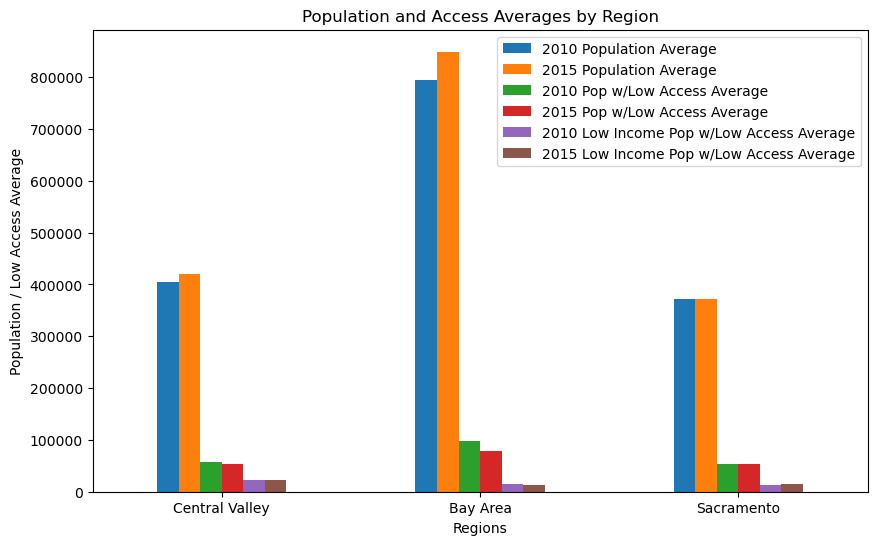

In [95]:
columns_to_plot= ["2010 Population Average", "2015 Population Average", "2010 Pop w/Low Access Average", "2015 Pop w/Low Access Average", "2010 Low Income Pop w/Low Access Average","2015 Low Income Pop w/Low Access Average"]
plotting_data= avg_popinfo_byregion[columns_to_plot]

ax = plotting_data.plot(kind='bar', figsize=(10, 6), rot=360)

ax.set_xlabel('Regions')
ax.set_ylabel('Population / Low Access Average')
ax.set_title('Population and Access Averages by Region')

plt.show()

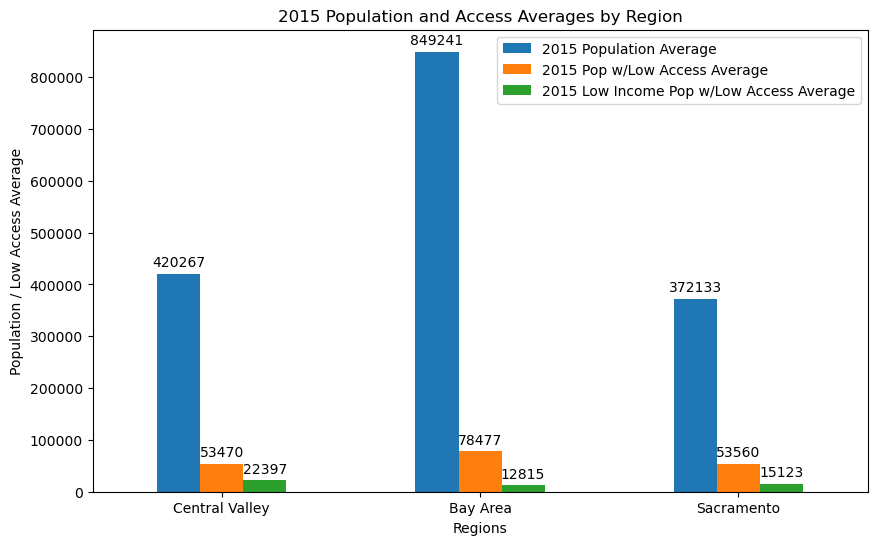

In [96]:
columns_to_plot= ["2015 Population Average", "2015 Pop w/Low Access Average", "2015 Low Income Pop w/Low Access Average"]
plotting_data= avg_popinfo_byregion[columns_to_plot]

ax = plotting_data.plot(kind='bar', figsize=(10, 6), rot=360)

ax.set_xlabel('Regions')
ax.set_ylabel('Population / Low Access Average')
ax.set_title('2015 Population and Access Averages by Region')

for rect in ax.containers:
    for r in rect:
        height = r.get_height()
        ax.annotate(f'{height:.0f}', xy=(r.get_x() + r.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')


plt.show()

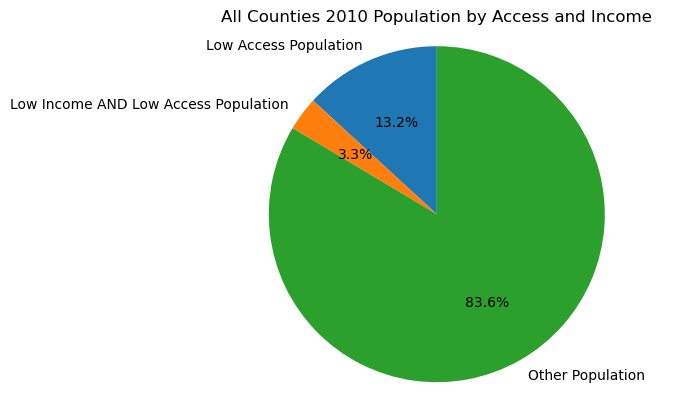

In [31]:
allregpopulations2010 = Access_regions_2010_2015_Pop_data[['2010 Population', '2010 Pop w/Low Store Access', '2010 Low Income Pop w/Low Store Access']]

total_2010population = allregpopulations2010['2010 Population'].sum()
lowaccess_2010population = allregpopulations2010['2010 Pop w/Low Store Access'].sum()
lowincome_lowaccess_2010population = allregpopulations2010['2010 Low Income Pop w/Low Store Access'].sum()

labels = ['Low Access Population', 'Low Income AND Low Access Population', 'Other Population']
sizes = [lowaccess_2010population, lowincome_lowaccess_2010population, total_2010population - lowaccess_2010population - lowincome_lowaccess_2010population]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('All Counties 2010 Population by Access and Income')

plt.show()

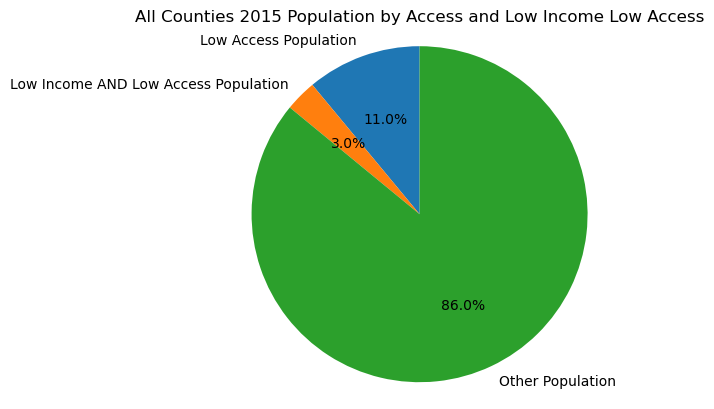

In [79]:
allregpopulations2015 = Access_regions_2010_2015_Pop_data[['2015 Population', '2015 Pop w/Low Store Access', '2015 Low Income Pop w/Low Store Access']]

total_2015population = allregpopulations2015['2015 Population'].sum()
lowaccess_2015population = allregpopulations2015['2015 Pop w/Low Store Access'].sum()
lowincome_lowaccess_2015population = allregpopulations2015['2015 Low Income Pop w/Low Store Access'].sum()

labels = ['Low Access Population', 'Low Income AND Low Access Population', 'Other Population']
sizes = [lowaccess_2015population, lowincome_lowaccess_2015population, total_2015population - lowaccess_2015population - lowincome_lowaccess_2015population]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('All Counties 2015 Population by Access and Low Income Low Access')

plt.show()


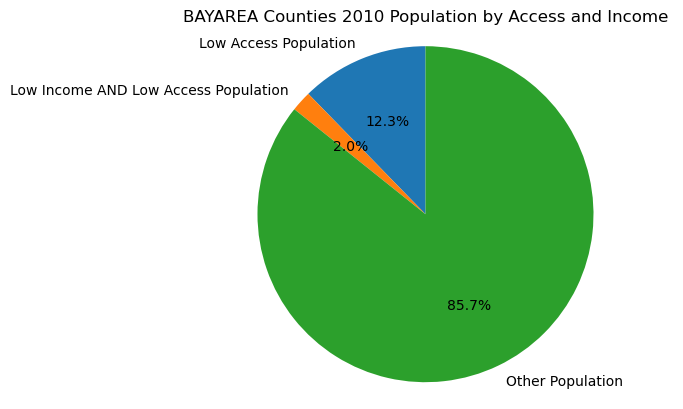

In [33]:
BAYpopulations = Access_BAYAREA_2010_2015_Pop_data[['2010 Population', '2010 Pop w/Low Store Access', '2010 Low Income Pop w/Low Store Access']]

BAYtotal_2010population = BAYpopulations['2010 Population'].sum()
BAYlowaccess_2010population = BAYpopulations['2010 Pop w/Low Store Access'].sum()
BAYlowincome_lowaccess_2010population = BAYpopulations['2010 Low Income Pop w/Low Store Access'].sum()

labels = ['Low Access Population', 'Low Income AND Low Access Population', 'Other Population']
sizes = [BAYlowaccess_2010population, BAYlowincome_lowaccess_2010population, BAYtotal_2010population - BAYlowaccess_2010population - BAYlowincome_lowaccess_2010population]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('BAYAREA Counties 2010 Population by Access and Income')

plt.show()


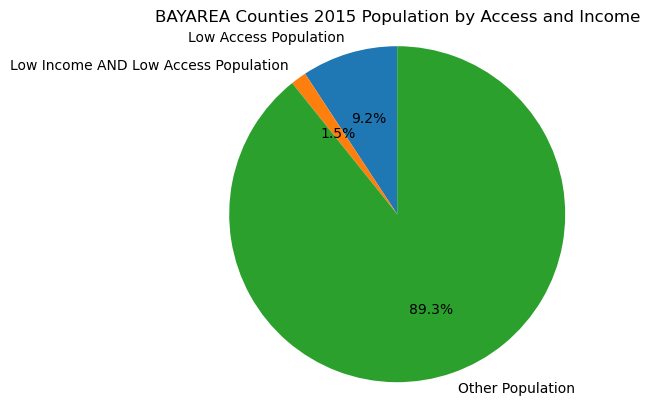

In [34]:
BAYpopulations2015 = Access_BAYAREA_2010_2015_Pop_data[['2015 Population', '2015 Pop w/Low Store Access', '2015 Low Income Pop w/Low Store Access']]

BAYtotal_2015population = BAYpopulations2015['2015 Population'].sum()
BAYlowaccess_2015population = BAYpopulations2015['2015 Pop w/Low Store Access'].sum()
BAYlowincome_lowaccess_2015population = BAYpopulations2015['2015 Low Income Pop w/Low Store Access'].sum()

labels = ['Low Access Population', 'Low Income AND Low Access Population', 'Other Population']
sizes = [BAYlowaccess_2015population, BAYlowincome_lowaccess_2015population, BAYtotal_2015population - BAYlowaccess_2015population - BAYlowincome_lowaccess_2015population]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('BAYAREA Counties 2015 Population by Access and Income')

plt.show()

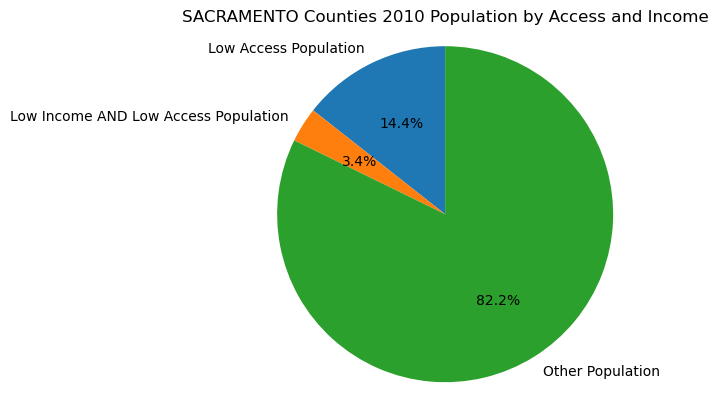

In [35]:
SACpopulations = Access_SAC_2010_2015_Pop_data[['2010 Population', '2010 Pop w/Low Store Access', '2010 Low Income Pop w/Low Store Access']]

SACtotal_2010population = SACpopulations['2010 Population'].sum()
SAClowaccess_2010population = SACpopulations['2010 Pop w/Low Store Access'].sum()
SAClowincome_lowaccess_2010population = SACpopulations['2010 Low Income Pop w/Low Store Access'].sum()

labels = ['Low Access Population', 'Low Income AND Low Access Population', 'Other Population']
sizes = [SAClowaccess_2010population, SAClowincome_lowaccess_2010population, SACtotal_2010population - SAClowaccess_2010population - SAClowincome_lowaccess_2010population]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('SACRAMENTO Counties 2010 Population by Access and Income')

plt.show()


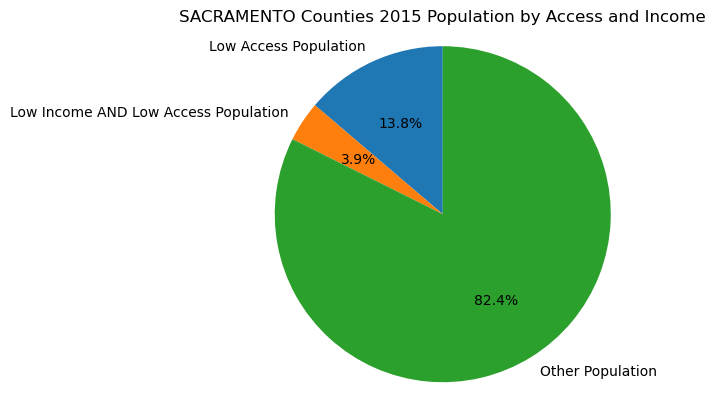

In [36]:
SACpopulations2015 = Access_SAC_2010_2015_Pop_data[['2015 Population', '2015 Pop w/Low Store Access', '2015 Low Income Pop w/Low Store Access']]

SACtotal_2015population = SACpopulations2015['2015 Population'].sum()
SAClowaccess_2015population = SACpopulations2015['2015 Pop w/Low Store Access'].sum()
SAClowincome_lowaccess_2015population = SACpopulations2015['2015 Low Income Pop w/Low Store Access'].sum()

labels = ['Low Access Population', 'Low Income AND Low Access Population', 'Other Population']
sizes = [SAClowaccess_2015population, SAClowincome_lowaccess_2015population, SACtotal_2015population - SAClowaccess_2015population - SAClowincome_lowaccess_2015population]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('SACRAMENTO Counties 2015 Population by Access and Income')

plt.show()

y = 0.02x +7506.11
The r-value is: 0.3218628056822966


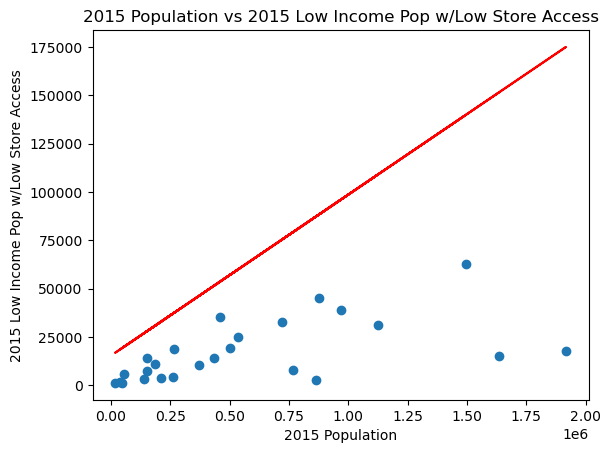

In [86]:
plt.scatter(popANDincomeinfo['2015 Population'], popANDincomeinfo['2015 Low Income Pop w/Low Store Access'])

plt.xlabel('2015 Population')

plt.ylabel('2015 Low Income Pop w/Low Store Access')

plt.title('2015 Population vs 2015 Low Income Pop w/Low Store Access')

plt.plot((popANDincomeinfo['2015 Population']),regress_values,"r-")

(slope, intercept, rvalue, pvalue, stderr) = linregress(popANDincomeinfo['2015 Population'], popANDincomeinfo['2015 Low Income Pop w/Low Store Access'])
regress_values = popANDincomeinfo['2015 Population'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {rvalue**2}")

plt.show()

y = 0.08x +15227.44
The r-value is: 0.6439122643229537


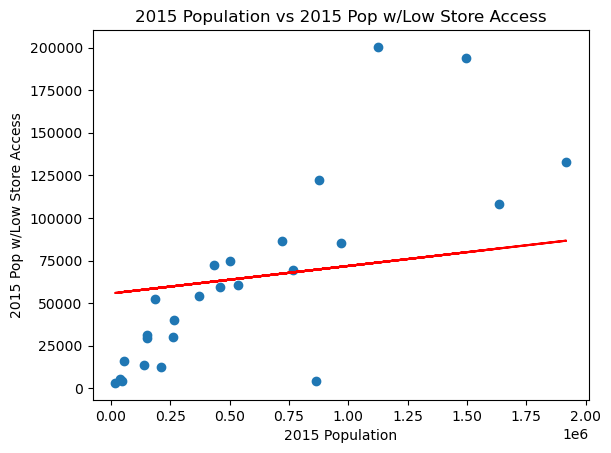

In [85]:
plt.scatter(popANDincomeinfo['2015 Population'], popANDincomeinfo['2015 Pop w/Low Store Access'])

plt.xlabel('2015 Population')

plt.ylabel('2015 Pop w/Low Store Access')

plt.title('2015 Population vs 2015 Pop w/Low Store Access')

plt.plot((popANDincomeinfo['2015 Population']),regress_values,"r-")

(slope, intercept, rvalue, pvalue, stderr) = linregress(popANDincomeinfo['2015 Population'], popANDincomeinfo['2015 Pop w/Low Store Access'])
regress_values = popANDincomeinfo['2015 Population'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {rvalue**2}")

plt.show()

In [84]:
Access_regions_2010_2015_Pop_data.hvplot.scatter(
    x='County',
    y='2010 Population',
    c='2010 Low Income Pop w/Low Store Access',
    cmap='viridis',
    size=50,
    alpha=0.5,
    title='Population Analysis',
    rot= 45).opts(yformatter='%.0f')


:Scatter   [County]   (2010 Population,2010 Low Income Pop w/Low Store Access)

In [82]:
Access_regions_2010_2015_Pop_data.hvplot.scatter(
    x='County',
    y='2015 Pop w/Low Store Access',
    c='2015 Low Income Pop w/Low Store Access',
    cmap='viridis',
    size=50,
    alpha=0.5,
    title='Population Analysis',rot= 45).opts(yformatter='%.0f')

    

:Scatter   [County]   (2015 Pop w/Low Store Access,2015 Low Income Pop w/Low Store Access)

In [39]:
#binning total pop data
min_2015val = (Access_regions_2010_2015_Pop_data["2015 Population"].min())
max_2015val = (Access_regions_2010_2015_Pop_data["2015 Population"].max())

num_bins = 10

# use numpy.linspace() to create the bins
bins_2015 = np.linspace((min_2015val -10), (max_2015val +10), num_bins)

# view the bins
print(bins_2015)

[  17612.          228709.66666667  439807.33333333  650905.
  862002.66666667 1073100.33333333 1284198.         1495295.66666667
 1706393.33333333 1917491.        ]


In [40]:
Access_regions_2010_2015_Pop_data["2015 pop bins"]=pd.cut(Access_regions_2010_2015_Pop_data['2015 Population'], bins_2015)
Access_regions_2010_2015_Pop_data.head()

,FIPS,State,2010 Population,2015 Population,2010 Pop w/Low Store Access,2015 Pop w/Low Store Access,%change '10-'15 Pop w/Low Store Access,2010 Low Income Pop w/Low Store Access,2015 Low Income Pop w/Low Store Access,%change '10-'15 Low Income Pop w/Low Store Access,2015 pop bins
County,,,,,,,,,,,
Alameda,6001.0,California,1510271.0,1634634.0,160424.9,107964.4,-32.700976,24226.7,15141.1,-37.502540,"(1495295.667, 1706393.333]"
Amador,6005.0,California,38091.0,37037.0,4760.4,5337.9,12.130220,1199.9,1360.4,13.373152,"(17612.0, 228709.667]"
Calaveras,6009.0,California,45578.0,44957.0,3907.4,4578.3,17.169096,978.6,1252.4,27.974646,"(17612.0, 228709.667]"
Contra Costa,6013.0,California,1049025.0,1124606.0,206021.8,200374.4,-2.741193,28361.3,31140.4,9.798921,"(1073100.333, 1284198.0]"
El Dorado,6017.0,California,181058.0,184660.0,50565.7,52705.5,4.231674,8605.4,10966.7,27.440298,"(17612.0, 228709.667]"


In [41]:
incomeinfo= regions_desert.loc[:,["MEDHHINC15"]]
incomeinfo=incomeinfo.rename(columns={"MEDHHINC15":"AVG 2015 Household income"})

incomeinfo.columns

Index(['AVG 2015 Household income'], dtype='object', name='Variable_Code')

In [42]:
popANDincomeinfo = pd.merge(Access_regions_2010_2015_Pop_data, incomeinfo, on="County")

popANDincomeinfo.head()

,FIPS,State,2010 Population,2015 Population,2010 Pop w/Low Store Access,2015 Pop w/Low Store Access,%change '10-'15 Pop w/Low Store Access,2010 Low Income Pop w/Low Store Access,2015 Low Income Pop w/Low Store Access,%change '10-'15 Low Income Pop w/Low Store Access,2015 pop bins,AVG 2015 Household income
County,,,,,,,,,,,,
Alameda,6001.0,California,1510271.0,1634634.0,160424.9,107964.4,-32.700976,24226.7,15141.1,-37.502540,"(1495295.667, 1706393.333]",81462.0
Amador,6005.0,California,38091.0,37037.0,4760.4,5337.9,12.130220,1199.9,1360.4,13.373152,"(17612.0, 228709.667]",55879.0
Calaveras,6009.0,California,45578.0,44957.0,3907.4,4578.3,17.169096,978.6,1252.4,27.974646,"(17612.0, 228709.667]",52471.0
Contra Costa,6013.0,California,1049025.0,1124606.0,206021.8,200374.4,-2.741193,28361.3,31140.4,9.798921,"(1073100.333, 1284198.0]",83036.0
El Dorado,6017.0,California,181058.0,184660.0,50565.7,52705.5,4.231674,8605.4,10966.7,27.440298,"(17612.0, 228709.667]",75575.0


y = 0.08x +59938.67
The r-value is: 0.05079566749323876


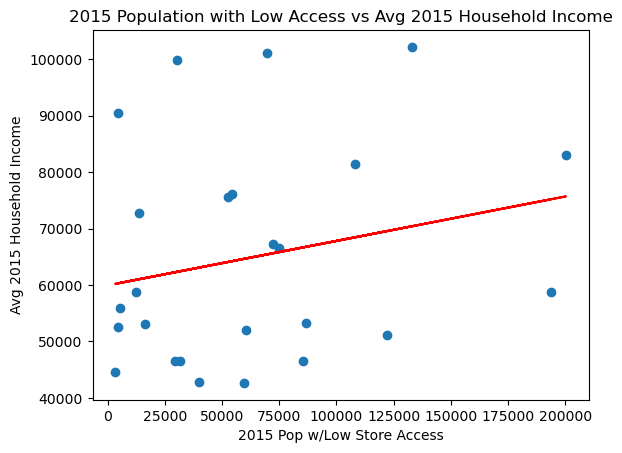

In [68]:
plt.scatter(popANDincomeinfo['2015 Pop w/Low Store Access'], popANDincomeinfo['AVG 2015 Household income'])

plt.xlabel('2015 Pop w/Low Store Access')

plt.ylabel('Avg 2015 Household Income')

plt.title('2015 Population with Low Access vs Avg 2015 Household Income')

plt.plot((popANDincomeinfo['2015 Pop w/Low Store Access']),regress_values,"r-")

(slope, intercept, rvalue, pvalue, stderr) = linregress(popANDincomeinfo['2015 Pop w/Low Store Access'], popANDincomeinfo['AVG 2015 Household income'])
regress_values = popANDincomeinfo['2015 Pop w/Low Store Access'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {rvalue**2}")

plt.show()

y = 0.02x +55694.47
The r-value is: 0.19816173611348842


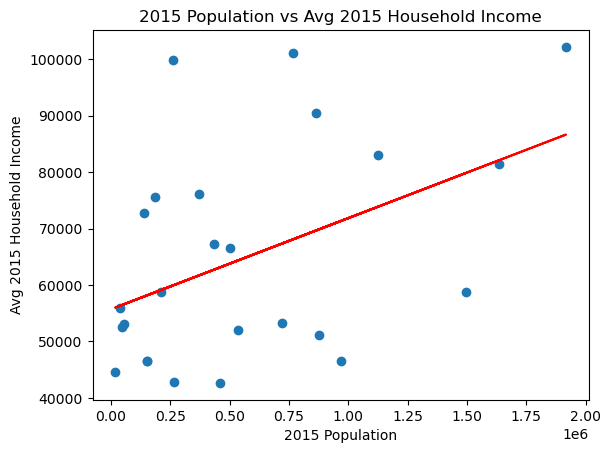

In [75]:
plt.scatter(popANDincomeinfo['2015 Population'], popANDincomeinfo['AVG 2015 Household income'])

plt.xlabel('2015 Population')

plt.ylabel('Avg 2015 Household Income')

plt.title('2015 Population vs Avg 2015 Household Income')

plt.plot((popANDincomeinfo['2015 Population']),regress_values,"r-")

(slope, intercept, rvalue, pvalue, stderr) = linregress(popANDincomeinfo['2015 Population'], popANDincomeinfo['AVG 2015 Household income'])
regress_values = popANDincomeinfo['2015 Population'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {rvalue**2}")

plt.show()

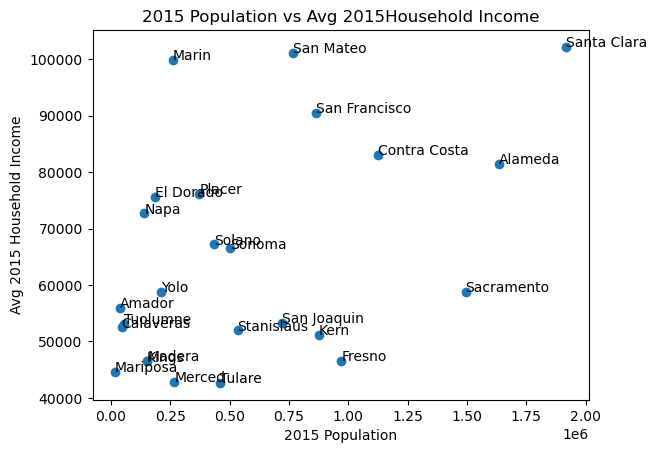

In [59]:
plt.scatter(popANDincomeinfo['2015 Population'], popANDincomeinfo['AVG 2015 Household income'])

# add a label for each point representing the county name
for i, txt in enumerate(popANDincomeinfo.index):
    plt.annotate(txt, (popANDincomeinfo['2015 Population'][i], popANDincomeinfo['AVG 2015 Household income'][i]))

# set the x-axis label
plt.xlabel('2015 Population')

# set the y-axis label
plt.ylabel('Avg 2015 Household Income')

# set the title of the plot
plt.title('2015 Population vs Avg 2015Household Income')


# display the plot
plt.show()

In [78]:
popANDincomeinfo.hvplot.scatter(
    x='County',
    y='2015 Population',
    c='AVG 2015 Household income',
    cmap='viridis',
    size=50,
    alpha=0.5,
    title='2015 Population VS AVG 2015 Income Analysis',rot= 45).opts(yformatter='%.0f',xlabel='AVG 2015 Household income',
    ylabel='2015 Population',
    colorbar_opts={'formatter': fmtrs.PrintfTickFormatter(format='%d')})


:Scatter   [County]   (2015 Population,AVG 2015 Household income)

In [46]:
popANDincomeinfo.hvplot.scatter(
    x='2015 Pop w/Low Store Access',
    y='AVG 2015 Household income',
    cmap='viridis',
    size=50,
    alpha=0.5,
    title='Population Analysis',rot= 45).opts(xformatter='%.0f', yformatter='%.0f')

    

:Scatter   [2015 Pop w/Low Store Access]   (AVG 2015 Household income)

In [47]:
scatter_plot=popANDincomeinfo.hvplot.scatter(
    x='2015 Low Income Pop w/Low Store Access',
    y='AVG 2015 Household income',
    cmap='viridis',
    size=50,
    alpha=0.5,
    title='Population Analysis',rot= 45).opts(xformatter='%.0f', yformatter='%.0f')

scatter_plot = scatter_plot.opts(xformatter='%.0f', yformatter='%.0f')

scatter_plot

:Scatter   [2015 Low Income Pop w/Low Store Access]   (AVG 2015 Household income)

In [48]:


hover = HoverTool(tooltips=[('County', '@index'), ('Low Income Pop', '@{2015 Low Income Pop w/Low Store Access}{0,0}'), ('Income', '@{AVG 2015 Household income}{0,0}')])

scatter_plot = popANDincomeinfo.hvplot.scatter(x='AVG 2015 Household income', y='2015 Low Income Pop w/Low Store Access', c='blue', size=50, hover=True, tools=[hover], title='Population Analysis', rot=45)

scatter_plot = scatter_plot.opts(xformatter='%.0f', yformatter='%.0f')

scatter_plot = scatter_plot.opts(xlabel='AVG 2015 Household income')

scatter_plot = scatter_plot.opts(ylabel='2015 Low Income Pop w/Low Store Access')

scatter_plot = scatter_plot.opts(title='2015 Population vs Avg 2015 Household Income')

scatter_plot

:Scatter   [AVG 2015 Household income]   (2015 Low Income Pop w/Low Store Access)

In [49]:
hover = HoverTool(tooltips=[('County', '@{County}{0,0}'), ('Low Income Pop', '@{2015 Low Income Pop w/Low Store Access}{0,0}'), ('Income', '@{AVG 2015 Household income}{0,0}')])

scatter_plot = popANDincomeinfo.hvplot.scatter(x='AVG 2015 Household income', y='2015 Low Income Pop w/Low Store Access', c='blue', size=50, hover=True, tools=[hover], title='Population Analysis', rot=45)

scatter_plot = scatter_plot.opts(xformatter='%.0f', yformatter='%.0f')

scatter_plot = scatter_plot.opts(xlabel='AVG 2015 Household income')

scatter_plot = scatter_plot.opts(ylabel='2015 Low Income Pop w/Low Store Access')

scatter_plot = scatter_plot.opts(title='2015 Population vs Avg 2015 Household Income')

scatter_plot 




:Scatter   [AVG 2015 Household income]   (2015 Low Income Pop w/Low Store Access)

In [50]:
correlation_coefficient = popANDincomeinfo['AVG 2015 Household income'].corr(popANDincomeinfo['2015 Population'])
print("Correlation coefficient:", correlation_coefficient)

from scipy.stats import pearsonr

r_value, p_value = pearsonr(popANDincomeinfo['AVG 2015 Household income'], popANDincomeinfo['2015 Population'])
print("r value:", r_value)
print("p value:", p_value)

Correlation coefficient: 0.44515360957032407
r value: 0.44515360957032407
p value: 0.02575574804130035
